In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data=pd.read_csv('Transformed_Housing_Data2.csv')

In [5]:
Y=data['Sale_Price']
X=scaler.fit_transform(data.drop(columns=['Sale_Price']))
X=pd.DataFrame(data=X,columns=data.drop(columns=['Sale_Price']).columns)
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,-0.398724,-1.447526,-0.979905,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,...,-0.087181,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,0.533718,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-1.426369,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.130534,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,...,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.435436,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,...,-0.087181,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


In [6]:
a=X.corr()

In [7]:
val=[]
for i in a.columns:
  for j in a.columns:
    if a[i].corr(a[j])>abs(0.5) and i!=j:
      val.append([i,j])

## **Removing Multicollinearity using VIF**

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vif_data=X
v=VIF=pd.Series([vif(vif_data.values,i) for i in range(len(vif_data.columns))],index=vif_data.columns)

In [9]:
def treat_mc(mc_data):
  VIF=pd.Series([vif(mc_data.values,i) for i in range(len(mc_data.columns))],index=mc_data.columns)
  if VIF.max()>5:
    a=VIF[VIF==VIF.max()].index[0]
    print(a,' has been removed')
    mc_data=mc_data.drop(columns=[a])
    return mc_data
  else:
    print('No multicollinearity remains in the data')
    return mc_data

In [10]:
for i in range(v[v>5].count()):
  vif_data=treat_mc(vif_data)

vif_data.head()

Flat Area (in Sqft)  has been removed
Condition_of_the_House_Fair  has been removed
No multicollinearity remains in the data
No multicollinearity remains in the data
No multicollinearity remains in the data
No multicollinearity remains in the data
No multicollinearity remains in the data


,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,-0.398724,-1.447526,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,-0.352576,...,-0.087181,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,1.161645,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,1.283619,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,-0.283288,...,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,0.409587,...,-0.087181,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


## **Splitting Data in Train and Test**

In [11]:
X=vif_data
Y=data['Sale_Price']

In [12]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,Y_train,Y_test=tts(X,Y,test_size=0.3,random_state=101)

X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((15126, 28), (6483, 28), (15126,), (6483,))

## **Linear Regression Using Sklearn**

In [13]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression(normalize=True)

In [14]:
#implimenting fit() function of lr that implements Gradient Descent
lr.fit(X_train,Y_train)

LinearRegression(normalize=True)

In [15]:
#coef_ function of lr shows the different values of slope(m1,m2,m3,....,mn) calculated by fit
lr.coef_

array([ -3928.66247639,  12028.44560689,  14967.00497585,   2697.55278605,
        27220.31313417,  59965.44665815,  80697.80906997,  27729.56715434,
        27873.90231343,  21397.40341959, -23854.32640243,  17943.26729788,
        -2896.98542901, -10179.085198  ,  14239.3533334 ,   5095.97603572,
        -2296.64888137,  14594.33847962,  10761.77007875,  12165.83372082,
        33842.29544383,  63269.82875283,  81086.08553213,  50718.63947886,
        73274.09568028,  40153.03595158,  67405.70271285,  22113.74944051])

In [16]:
predictions=lr.predict(X_test) # Generate Predictions 
lr.score(X_test,Y_test) # score function calculate the R2 value

0.8461987715586199

## **Verifying the assumptions of Linear Regressin Model**

In [17]:
residual=predictions-Y_test
res_table=pd.DataFrame({'Residual':residual,'Predictions':predictions})
res_table=res_table.sort_values(by='Predictions')

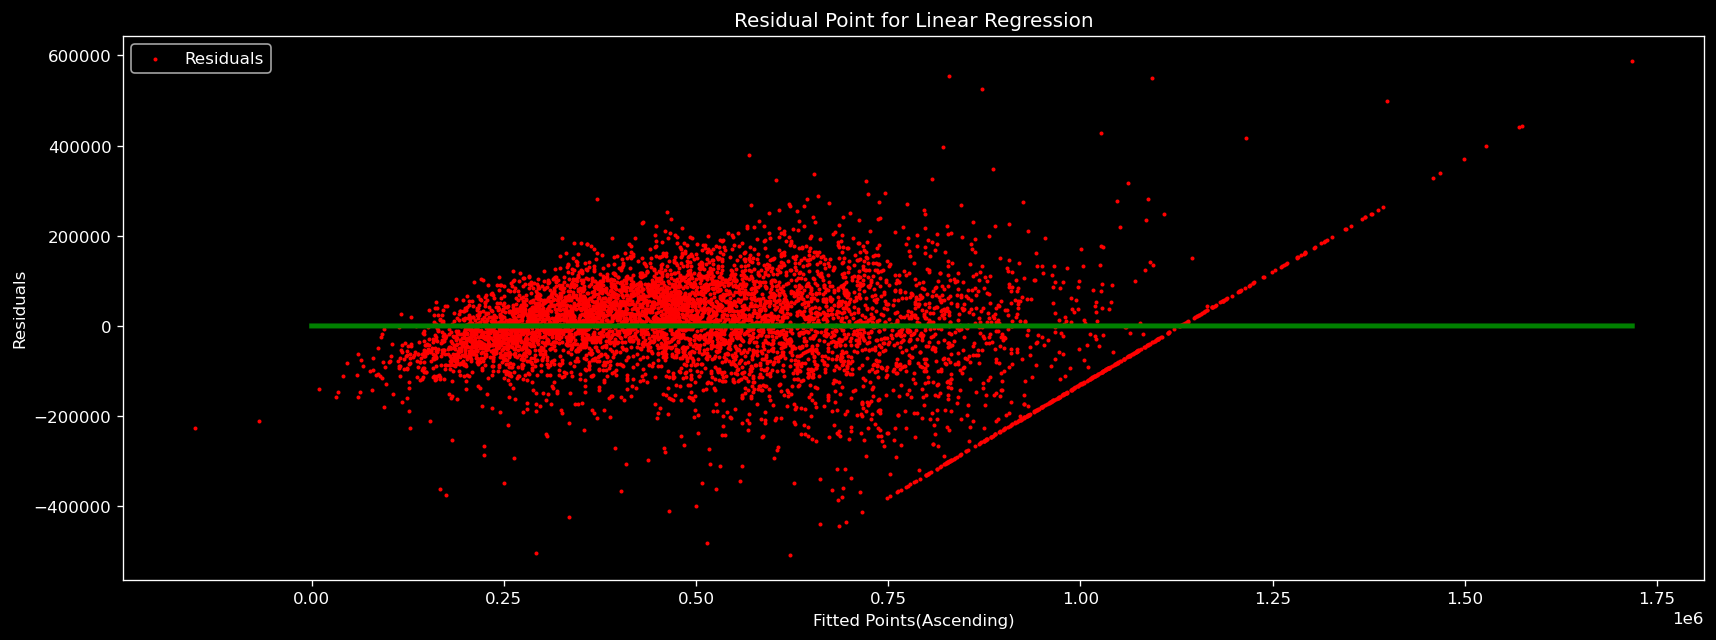

In [18]:
#plotting the Residual Graph
l=[0 for x in range(int(res_table.Predictions.max()))]
k=[x for x in range(int(res_table.Predictions.max()))]

plt.figure(dpi=120,figsize=(17,6))
plt.scatter(res_table.Predictions,res_table.Residual,color='red',label='Residuals',s=2)
plt.plot(k,l,color='green',linewidth=3)
plt.xlabel('Fitted Points(Ascending)')
plt.ylabel('Residuals')
plt.title('Residual Point for Linear Regression')
plt.legend()

## **Distribution of the error terms**

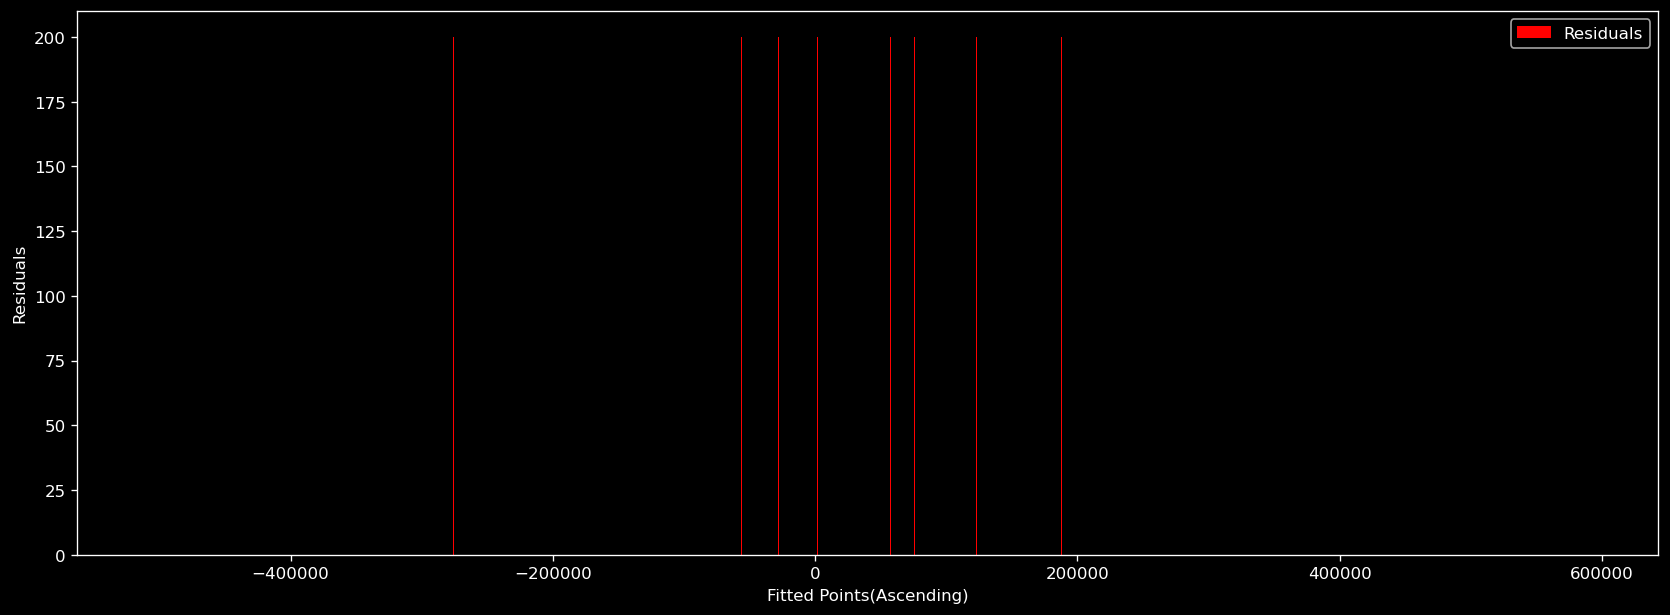

In [21]:
plt.figure(dpi=120,figsize=(17,6))
plt.bar(res_table.Residual,200,color='red',width=1.4,label='Residuals')
plt.xlabel('Fitted Points(Ascending)')
plt.ylabel('Residuals')
plt.legend()
plt.show()

## **Visualising Coefficent/Interpreting the Results of Your Linear Regression Model**

In [ ]:
coef_table=pd.DataFrame({'columns':X_train.columns,'coeff':lr.coef_})
coef_table=coef_table.sort_values(by='coeff')

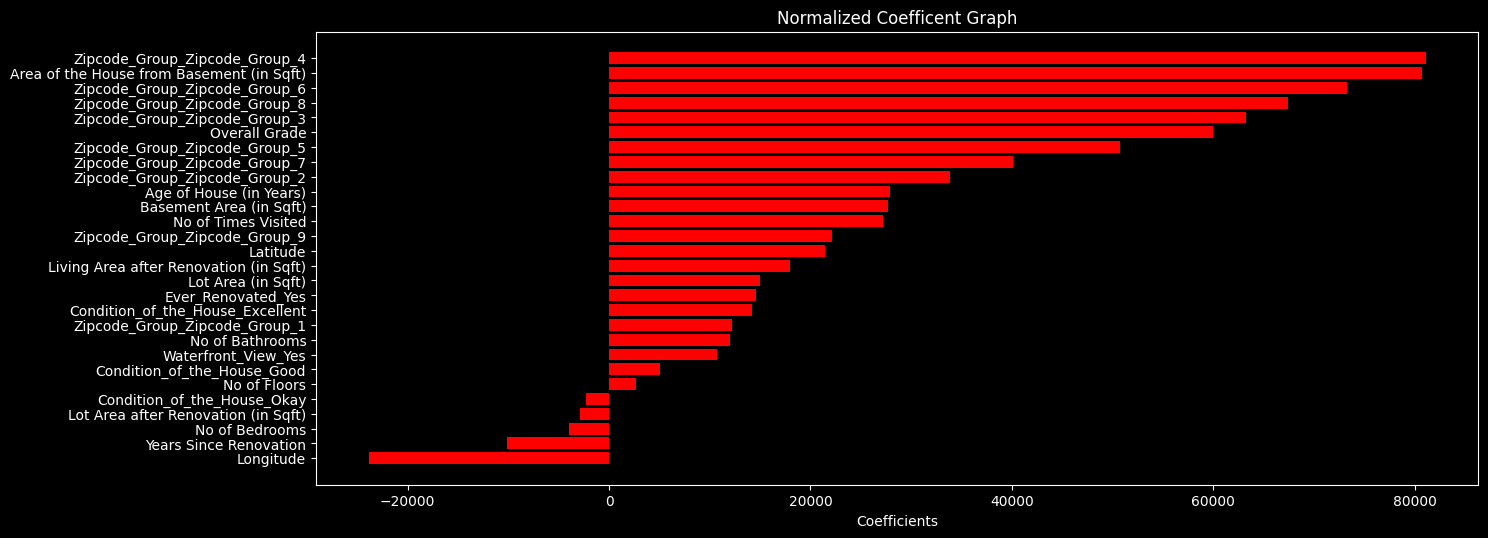

In [ ]:
plt.figure(figsize=(15,6),dpi=100)
x=coef_table['columns']
y=coef_table['coeff']
plt.barh(x,y,color='red') #Horizontal Bar Graph
plt.xlabel('Coefficients')
plt.title('Normalized Coefficent Graph')
plt.show()